In [78]:
import pandas as pd

# komoran.morphs : 형태소 분리
# komoran.pos : 토크나이징된 형태소들에 품사를 대응시킴
# komoran.nouns : 명사만 추출가능

# kkma.sentences() : 문장별로 구분

# okt.normalize() : 맞춤법
# okt.phrases() : 어구 단위로 추출

In [79]:
# from google.colab import drive
# drive.mount('/content/drive')

In [80]:
# !pip install konlpy
from konlpy.tag import Komoran
import pickle

class Preprocess:

  def __init__(self,userdic=None):

    self.komoran = Komoran(userdic=userdic)

    self.exclusion_tags = [
    'JKS', 'JKC', 'JKG', 'JKO', 'JKB', 'JKV', 'JKQ',
    # 주격조사, 보격조사, 관형격조사, 목적격조사, 부사격조사, 호격조사, 인용격조사
    'JX', 'JC',
    # 보조사, 접속조사
    'SF', 'SP', 'SS', 'SE', 'SO',
    # 마침표,물음표,느낌표(SF), 쉼표,가운뎃점,콜론,빗금(SP), 따옴표,괄호표,줄표(SS), 줄임표(SE), 붙임표(물결,숨김,빠짐)(SO)
    'EP', 'EF', 'EC', 'ETN', 'ETM',
    # 선어말어미, 종결어미, 연결어미, 명사형전성어미, 관형형전성어미
    'XSN', 'XSV', 'XSA'
    # 명사파생접미사, 동사파생접미사, 형용사파생접미사
    ]
        
    # 형태소 분석기 POS 태거
  def pos(self, sentence):
    return self.komoran.pos(sentence)

    # 불용어 제거 후 필요한 품사 정보만 가져오기
  def get_keywords(self, pos, without_tag=False):
    f = lambda x: x in self.exclusion_tags
    # print(pos)
    word_list = []
    for p in pos:
        if f(p[1]) is False:
            word_list.append(p if without_tag is False else p[0])
    return word_list



In [81]:
sent = "컴공 과사 번호를 알려줘 병신아!"

# userdic 
# https://needjarvis.tistory.com/741
# 직접 우리 프로젝트 테마에 맞게 등록하면됌
# ex)
# 호호반점 NNG

# 전처리 객체
p = Preprocess(userdic='/content/drive/MyDrive/새싹_인공지능SW교육/프로젝트/새싹_최종프로젝트/chatbot_try/useridc/user_dic.tsv')

# 형태소 분석기
pos = p.pos(sent)
print(f'pos: {pos}')
# 키워드,품사 출력
ret = p.get_keywords(pos,without_tag=False) 
# False로 했기 때문에 품사가 포함됌
# ex) 를 JKO
ret

pos: [('컴공', 'NNP'), ('과사', 'NNP'), ('번호', 'NNG'), ('를', 'JKO'), ('알리', 'VV'), ('어', 'EC'), ('주', 'VX'), ('어', 'EC'), ('병신', 'NNP'), ('아', 'JKV'), ('!', 'SF')]


[('컴공', 'NNP'),
 ('과사', 'NNP'),
 ('번호', 'NNG'),
 ('알리', 'VV'),
 ('주', 'VX'),
 ('병신', 'NNP')]

In [82]:
import pandas as pd
import pickle

# 말뭉치 데이터 읽어오기
movie_review = pd.read_csv('/content/drive/MyDrive/새싹_인공지능SW교육/프로젝트/새싹_최종프로젝트/chatbot_try/csv_data/영화리뷰.csv',encoding='CP949')
purpose = pd.read_csv('/content/drive/MyDrive/새싹_인공지능SW교육/프로젝트/새싹_최종프로젝트/chatbot_try/csv_data/용도별목적대화데이터.csv',encoding='CP949')
common_sense = pd.read_csv('/content/drive/MyDrive/새싹_인공지능SW교육/프로젝트/새싹_최종프로젝트/chatbot_try/csv_data/일반상식.csv',encoding='CP949')
topic = pd.read_csv('/content/drive/MyDrive/새싹_인공지능SW교육/프로젝트/새싹_최종프로젝트/chatbot_try/csv_data/주제별일상대화데이터.csv',encoding='CP949')

In [83]:
topic.head()

,text
0,애덜앙 나 너무 배불러서 배 아파
1,배 아프면 약국 가서 소화제라도 마시는 거 어때
2,얼마나 먹었다고 배가 아프데
3,떡볶이랑 튀김이랑 닭껍질튀김이랑 마카롱 먹었어
4,하긴 *이 배는 파리보다 작으니까 당연히 그만큼 먹어도 배부르지


In [84]:
common_sense.head()

,intent,query,answer
0,일반상식,다테 기미코가 최초로 은퇴 선언을 한게 언제지,1996년 9월 24일
1,일반상식,ave;new 본거지 어디야,도쿄 치요다구
2,일반상식,사카이 다다요시의 아버지가 누구지,사카이 나오타카(酒井直隆)
3,일반상식,일반성면의 면적이 얼마야,19.41 km²
4,일반상식,금나라를 세운 사람이 누구야,태조 아구다


In [85]:
# 결측값 제거
movie_review.dropna(inplace=True)
purpose.dropna(inplace=True)
topic.dropna(inplace=True)
common_sense.dropna(inplace=True)

In [86]:
text1 = list(movie_review['document'])
text2 = list(purpose['text'])
text3 = list(topic['text'])
text4 = list(common_sense['query'])+list(common_sense['answer'])

In [87]:
# 모든 단어들 다 넣음
corpus_data = text1 + text2 + text3 + text4

In [88]:
len(corpus_data)

2263322

In [89]:
corpus_data[2263315:2263322]

['1905년 2월 1일',
 '54,000마리',
 '브라마나',
 '1990년 보안사령부(현재의 기무사)에 근무하던 윤석양 이병이 보안사의 사찰 대상 민간인 목록이 담긴 디스크를 들고 탈영해 그 목록을 공개한 사건',
 '신해철',
 '21개',
 '후쿠오카 리틀리그에서 오른쪽 어깨에 부상을 입은 뒤로 야구부에 들어가지 않았다']

In [90]:
from tqdm import tqdm

# 말뭉치 데이터에서 키워드(단어)만 추출하여 단어 사전 리스트 생성
# 약 20분 소요
p = Preprocess()

dict1 = []
for c in tqdm(corpus_data):
  pos = p.pos(c)
  for k in pos:
    dict1.append(k[0])

dict1[:50]

100%|██████████| 2263322/2263322 [22:39<00:00, 1664.66it/s]


['어리',
 'ㄹ',
 '때',
 '보고',
 '지금',
 '다시',
 '보',
 '아도',
 '재밌어요ㅋㅋ',
 '디자인',
 '을',
 '배우',
 '는',
 '학생',
 '으로',
 ',',
 '외국',
 '디자이너',
 '와',
 '그',
 '들',
 '이',
 '일구',
 'ㄴ',
 '전통',
 '을',
 '통하',
 '아',
 '발전',
 '하',
 '아',
 '가',
 '는',
 '문화',
 '산업',
 '이',
 '부럽',
 '었',
 '는데',
 '.',
 '사실',
 '우리나라',
 '에서',
 '도',
 '그',
 '어렵',
 'ㄴ',
 '시절',
 '에',
 '끝']

In [91]:
from tensorflow.keras import preprocessing
# 사전에 사용될 word2index 생성
# 사전의 첫번쨰 인덱스에는 OOV 사용
# OOV : 사전에 없는 단어는 word2index = 1로 바꿔줌

# OOV token 이란? https://hyoeun-log.tistory.com/entry/WEEK1-NLP-in-Tensorflow-Tokenizer-OOV-token-padsequences

tokenizer = preprocessing.text.Tokenizer(oov_token='OOV', num_words=100000)
tokenizer.fit_on_texts(dict1)
word_index = tokenizer.word_index
print(len(word_index))

157410


In [92]:
# key,value로 단어에 대응되는 인덱스들 출력해봄
dict1[0] , dict1[1] , dict1[2] , dict1[3] , dict1[4]

('어리', 'ㄹ', '때', '보고', '지금')

In [93]:
word_index[dict1[0]], word_index[dict1[1]],word_index[dict1[2]] , word_index[dict1[3]],word_index[dict1[4]]

(344, 19, 73, 527, 102)

In [94]:
# bin 파일로 만들면 데이터 전송 시 빠르다(?)
f = open("chatbot_dict.bin","wb")
try:
  pickle.dump(word_index,f)
except Exception as e:
  print(e)
finally:
  f.close()

In [95]:
f = open("/content/drive/MyDrive/새싹_인공지능SW교육/프로젝트/새싹_최종프로젝트/chatbot_try/chatbot_dict.bin","rb")
word_index = pickle.load(f)
f.close()

# 확인1

# 전처리 객체 생성
p = Preprocess(userdic='/content/drive/MyDrive/새싹_인공지능SW교육/프로젝트/새싹_최종프로젝트/chatbot_try/useridc/user_dic.tsv')

# 예문
sent1 = "안녕하세요.테스트 코드 입니다. 단어사전 만들기 성공?"

# 형태소 분석
pos = p.pos(sent1)

# 품사 태그없이 키워드 출력

keywords = p.get_keywords(pos,without_tag=True)
for word in keywords:
  try:
    print(word,word_index[word])
  except KeyError:
    # key없을 때 key 에러(단어가 사전에 없을때)
    # OOV 처리됌
    print(word,word_index['OOV'])

안녕하세요 137
테스트 2438
코드 1907
이 3
단어 1941
사전 2030
만들 164
성공 1275


In [96]:
# 확인2

# 전처리 객체 생성
p = Preprocess(userdic='/content/drive/MyDrive/새싹_인공지능SW교육/프로젝트/새싹_최종프로젝트/chatbot_try/useridc/user_dic.tsv')

# 예문
sent2 = "최종 프로젝트 잘 마치고 취업합시다! 화이팅! 취뽀 가자! 오늘 점심 호호반점 갈까?"

# 형태소 분석
pos = p.pos(sent2)

# 품사 태그없이 키워드(단어만) 출력

keywords = p.get_keywords(pos,without_tag=True)
for word in keywords:
  try:
    print(word,word_index[word])
  except KeyError:
    # key없을 때 key 에러(단어가 사전에 없을때)
    # OOV 처리됌
    print(word,word_index['OOV'])

최종 3560
프로젝트 3559
잘 61
마치 1864
취업 959
화이팅 2058
취뽀 40470
가 8
오늘 165
점심 1031
호 1188
호반 18172
점 176
가 8


In [97]:
# 전처리 클래스에
#  단어 인덱스 사전 추가함

class Preprocess:

    # 생성자 __init에서 파라미터로 
    # 1) word2index_dic : 모든 단어에 대응되는 인덱스를 붙여한 파일
    # 2) user_dic.tsv : komoran에서 제공하지 않는 단어:품사 목록을 개발자가 작성함

    def __init__(self, word2index_dic='../train_tools/dict/chatbot_dict.bin' ,userdic='user_dic.tsv'): # userdic 인자에는 사용자 정의 사전 파일 경로 입력가능
        # 단어 인덱스 사전 불러오기 추가
        if(word2index_dic != ''):
            f = open(word2index_dic, "rb")
            self.word_index = pickle.load(f)
            f.close()
            print("단어 사전 로드 완료..")
        else:
            self.word_index = None
            print("단어 사전 로드 실패..")

        # 형태소 분석기 초기화
        self.komoran = Komoran(userdic=userdic)

        # 제외할 품사
        # 참조 : https://docs.komoran.kr/firststep/postypes.html
        # 관계언 제거, 기호 제거
        # 어미 제거
        # 접미사 제거
        self.exclusion_tags = [
            'JKS', 'JKC', 'JKG', 'JKO', 'JKB', 'JKV', 'JKQ',
            # 주격조사, 보격조사, 관형격조사, 목적격조사, 부사격조사, 호격조사, 인용격조사
            'JX', 'JC',
            # 보조사, 접속조사
            'SF', 'SP', 'SS', 'SE', 'SO',
            # 마침표,물음표,느낌표(SF), 쉼표,가운뎃점,콜론,빗금(SP), 따옴표,괄호표,줄표(SS), 줄임표(SE), 붙임표(물결,숨김,빠짐)(SO)
            'EP', 'EF', 'EC', 'ETN', 'ETM',
            # 선어말어미, 종결어미, 연결어미, 명사형전성어미, 관형형전성어미
            'XSN', 'XSV', 'XSA'
            # 명사파생접미사, 동사파생접미사, 형용사파생접미사
        ]


    # 형태소 분석기 POS 태거
    def pos(self, sentence):
        return self.komoran.pos(sentence)

    # 불용어 제거 후 필요한 단어,품사 정보만 가져오기
    # True시 품사없이 단어만 list로 가져옴
    def get_keywords(self, pos, without_tag=False):
        f = lambda x: x in self.exclusion_tags
        word_list = []
        for p in pos:
            if f(p[1]) is False:
                word_list.append(p if without_tag is False else p[0])
        return word_list

    # 키워드를 단어 인덱스 시퀀스로 변환
    # 단어들에게 인덱스를 부여함

    def get_wordidx_sequence(self, keywords):
        if self.word_index is None:
            return []
        w2i = []
        for word in keywords:
            try:
                w2i.append(self.word_index[word])
            except KeyError:
                # 해당 단어가 사전에 없는 경우 OOV 처리
                w2i.append(self.word_index['OOV'])
        return w2i

#의도 분류 모델 학습 데이터 생성하기

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from konlpy.tag import Komoran
import matplotlib.pyplot as plt

In [99]:
movie = pd.read_csv("/content/drive/MyDrive/새싹_인공지능SW교육/프로젝트/새싹_최종프로젝트/chatbot_try/csv_data/영화리뷰.csv",encoding='CP949')
purpose = pd.read_csv("/content/drive/MyDrive/새싹_인공지능SW교육/프로젝트/새싹_최종프로젝트/chatbot_try/csv_data/용도별목적대화데이터.csv",encoding='CP949')
topic = pd.read_csv("/content/drive/MyDrive/새싹_인공지능SW교육/프로젝트/새싹_최종프로젝트/chatbot_try/csv_data/주제별일상대화데이터.csv",encoding='CP949')
common_sense = pd.read_csv("/content/drive/MyDrive/새싹_인공지능SW교육/프로젝트/새싹_최종프로젝트/chatbot_try/csv_data/일반상식.csv",encoding='CP949')
add = pd.read_csv("/content/drive/MyDrive/새싹_인공지능SW교육/프로젝트/새싹_최종프로젝트/chatbot_try/csv_data/추가데이터.csv",encoding='CP949')

In [100]:
movie.dropna(inplace=True)
purpose.dropna(inplace=True)
topic.dropna(inplace=True)
common_sense.dropna(inplace=True)
add.dropna(inplace=True)

In [101]:
print(f"movie shape => {movie.shape}\n\
purpose shape => {purpose.shape}\n\
topic shape => {topic.shape}\n\
common_sense shape => {common_sense.shape}\n\
add => {add.shape}")

movie shape => (199992, 3)
purpose shape => (480494, 1)
topic shape => (1445760, 1)
common_sense shape => (68538, 3)
add => (9216, 2)


In [102]:
movie.columns

Index(['id', 'document', 'label'], dtype='object')

In [103]:
purpose.columns

Index(['text'], dtype='object')

In [104]:
topic.columns

Index(['text'], dtype='object')

In [105]:
common_sense.columns

Index(['intent', 'query', 'answer'], dtype='object')

In [106]:
add.columns

Index(['query', 'intent'], dtype='object')

In [107]:
all_data = list(movie['document']) + list(purpose['text']) + list(topic['text']) + list(common_sense['query']) \
+ list(common_sense['answer']) + list(add['query'])

# add 라는 추가데이터는 의도에 대한 답변 데이터로
# 개발자가 직접 만든 파일인듯함

In [108]:
len(all_data)

2272538

In [109]:
# 통합본 생성하고 저장하기
total = pd.DataFrame({'text': all_data})
total.to_csv("/content/drive/MyDrive/새싹_인공지능SW교육/프로젝트/새싹_최종프로젝트/chatbot_try/csv_data/통합본데이터.csv", index=False)
total.head()

,text
0,어릴때보고 지금다시봐도 재밌어요ㅋㅋ
1,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산..."
2,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.
3,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...
4,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.


In [110]:
total.tail()

,text
2272533,흡연충이 언제 슈퍼영웅이 되었냐?
2272534,페이스북에 잘난부모둔게죄냐는 글올린 당당함은 언제그랫었냐는듯 전혀다른사람같은태도군
2272535,언제환기시킬수 있는지 모르겠다 거의 미세먼지라서 그런지
2272536,스스로나가면 스스로나가면 연봉 안줘도되고 짜르면 남은 기간 연봉 다줘야하고 그게 팩트다
2272537,언제까지 인터넷여론이 진짜 여론인줄알거야? ㅋㅋ


In [111]:
# 의도 분류 데이터 생성하기
# 0 -> 번호, 1 -> 장소, 2 -> 시간, 3 -> 기타

number = []
place = []
time = []
etc = []

In [112]:
for i in all_data:
  # place.append() , 장소 묻기
  # number.append() ,번호 묻기
  # time.append(), 시간 묻기
  # etc.append(), 기타 요청

  # 모든 문장 데이터들을 합하고
  # * 의도에 따라 문장들을 분류함!

  if ('어디' or '장소' or '위치' or '주소') in i:
    place.append(i)
  elif ('번호' or '전화') in i:
    number.append(i)
  elif ('시작' or '마감' or '언제' or '기간' or '시간') in i:
    time.append(i)
  else:
    etc.append(i)
len(place),len(number),len(time), len(etc)

(29336, 12512, 8332, 2222358)

In [113]:
# 의도별 라벨 붙히기

number_label = []
for _ in range(len(number)):
    number_label.append(0)

time_label = []
for _ in range(len(time)):
    time_label.append(2)

place_label = []
for _ in range(len(place)):
    place_label.append(1)
len(place_label) , len(number_label) , len(time_label)

(29336, 12512, 8332)

In [114]:
train_df = pd.DataFrame({'text':number+place+time,
                         'label':number_label+place_label+time_label})

In [115]:
train_df.head()

,text,label
0,이 영화 있는사람 공유 부탁합니다 제 폰번호 010 4427 2774 연락한통만요^-^;,0
1,작가때문에 1점 주려다가 영화가 너무 좋아서 10점줌비행기를 끌고 추운곳에다 추락시...,0
2,비밀번호가 뭐야? 서윤내사랑 ㅋ_ㅋ,0
3,용팔이 시르즈를 볼려면 어떻게 하는지.전화번호좀,0
4,보다 말았는데 심장 졸라 쫄깃해진다;; 근데 여주 졸라 답답함. 세면대 물기 닦는 ...,0


In [116]:
train_df.sample(5)

,text,label
23384,다들 옷 어디서 자주 사?,1
41431,떡만두국 주문 어디서 하죠?,1
37551,1932년 윤봉길 의사가 의거한 장소는 어디야,1
31054,지하철에서 가까운데 동네 돌아다닐때는 마을버스가 어디든 가니까 편리해,1
3181,이름은 #@이름#이구요 번호는 #@전번#이요,0


In [117]:
train_df.sample(5)

,text,label
2276,아니요 홈페이지에서 비밀번호를 재설정 하셔야 합니다,0
21253,아니 대체 그런 건 어디서 사냐 키키,1
44551,이게 이번주 금요일에 시작하는 건데 금요일이 공휴일이면,2
9199,변경하려는 카드번호가 #@금융#이네요,0
15893,자료를 사용하고 싶은데 어디에 요청하면 될까요,1


In [118]:
# 0 -> 번호, 1 -> 장소, 2 -> 시간, 3 -> 기타
train_df[train_df['label']==0]

,text,label
0,이 영화 있는사람 공유 부탁합니다 제 폰번호 010 4427 2774 연락한통만요^-^;,0
1,작가때문에 1점 주려다가 영화가 너무 좋아서 10점줌비행기를 끌고 추운곳에다 추락시...,0
2,비밀번호가 뭐야? 서윤내사랑 ㅋ_ㅋ,0
3,용팔이 시르즈를 볼려면 어떻게 하는지.전화번호좀,0
4,보다 말았는데 심장 졸라 쫄깃해진다;; 근데 여주 졸라 답답함. 세면대 물기 닦는 ...,0
...,...,...
12507,학원에서 어쩌다 보니 어느 여자 번호를 얻었어.,0
12508,방어율 99.9라서 등번호 99로 지었냐,0
12509,다른건 몰라도 주민등록번호 유출한건 처벌 해야한다,0
12510,동영상 찍고 차량 번호 찍고 시간대 찍어서 회사측에 보내도록해 그리고 이런사람은 다...,0


In [119]:
# index 초기화, 원본에 적용
# https://wikidocs.net/155404
train_df.reset_index(drop=True, inplace=True)
train_df.tail()

,text,label
50175,선배님들은 아이출산하고 언제쯤 생리 시작하셨나요?,2
50176,부정출혈이 있고 난 후 며칠 뒤에 생리 시작하는지 아시는분 있나요...?,2
50177,언제 시작하고 언제 끝났는지,2
50178,며칠전에 머리를 매직하고 나서부터슬슬 여자로서의 자각은 가지고 다니기 시작했는데얼마...,2
50179,가을언제 시작햇다고 끝나냐 ...,2


In [120]:
!pwd

/content/drive/MyDrive/새싹_인공지능SW교육/프로젝트/새싹_최종프로젝트/chatbot_try/csv_data


In [121]:
%cd /content/drive/MyDrive/새싹_인공지능SW교육/프로젝트/새싹_최종프로젝트/chatbot_try/csv_data
train_df.to_csv("train_data.csv", index=False)

/content/drive/MyDrive/새싹_인공지능SW교육/프로젝트/새싹_최종프로젝트/chatbot_try/csv_data


In [122]:
data = pd.read_csv('train_data.csv')

In [123]:
data.tail()

,text,label
50175,선배님들은 아이출산하고 언제쯤 생리 시작하셨나요?,2
50176,부정출혈이 있고 난 후 며칠 뒤에 생리 시작하는지 아시는분 있나요...?,2
50177,언제 시작하고 언제 끝났는지,2
50178,며칠전에 머리를 매직하고 나서부터슬슬 여자로서의 자각은 가지고 다니기 시작했는데얼마...,2
50179,가을언제 시작햇다고 끝나냐 ...,2


In [124]:
data.shape

(50180, 2)

In [125]:
tokenizer = Komoran()

# data의 모든 문장들의 토큰/품사 리스트로 저장
data_tokenized = [[token+"/"+POS for token, POS in tokenizer.pos(text_)] for text_ in data['text']]

In [126]:
data_tokenized[0]

['이/MM',
 '영화/NNG',
 '있/VV',
 '는/ETM',
 '사람/NNP',
 '공유/NNP',
 '부탁/NNG',
 '하/XSV',
 'ㅂ니다/EC',
 '제/XPN',
 '폰/NNG',
 '번호/NNG',
 '010/SN',
 '4427/SN',
 '2774/SN',
 '연락/NNG',
 '한통/NNP',
 '만요/NNP',
 '^/SW',
 '-/SS',
 '^/SW',
 ';/SP']

In [127]:
data_tokenized[:5]

# 참고
# self.exclusion_tags = [
#     'JKS', 'JKC', 'JKG', 'JKO', 'JKB', 'JKV', 'JKQ',
#     # 주격조사, 보격조사, 관형격조사, 목적격조사, 부사격조사, 호격조사, 인용격조사
#     'JX', 'JC',
#     # 보조사, 접속조사
#     'SF', 'SP', 'SS', 'SE', 'SO',
#     # 마침표,물음표,느낌표(SF), 쉼표,가운뎃점,콜론,빗금(SP), 따옴표,괄호표,줄표(SS), 줄임표(SE), 붙임표(물결,숨김,빠짐)(SO)
#     'EP', 'EF', 'EC', 'ETN', 'ETM',
#     # 선어말어미, 종결어미, 연결어미, 명사형전성어미, 관형형전성어미
#     'XSN', 'XSV', 'XSA'
#     # 명사파생접미사, 동사파생접미사, 형용사파생접미사
# ]


[['이/MM',
  '영화/NNG',
  '있/VV',
  '는/ETM',
  '사람/NNP',
  '공유/NNP',
  '부탁/NNG',
  '하/XSV',
  'ㅂ니다/EC',
  '제/XPN',
  '폰/NNG',
  '번호/NNG',
  '010/SN',
  '4427/SN',
  '2774/SN',
  '연락/NNG',
  '한통/NNP',
  '만요/NNP',
  '^/SW',
  '-/SS',
  '^/SW',
  ';/SP'],
 ['작가/NNP',
  '때문/NNB',
  '에/JKB',
  '1/SN',
  '점/NNB',
  '주/VX',
  '려다가/EC',
  '영화/NNG',
  '가/JKS',
  '너무/MAG',
  '좋아서/NNP',
  '10/SN',
  '점/NNB',
  '줌/NNG',
  '비행기/NNG',
  '를/JKO',
  '끌/VV',
  '고/EC',
  '춥/VA',
  'ㄴ/ETM',
  '곳/NNG',
  '에다/JKB',
  '추락/NNG',
  '시키/XSV',
  '는/ETM',
  '대/NNB',
  '애시/NNP',
  '당초/NNG',
  '비행기/NNP',
  '자체/NNG',
  '가/JKS',
  '"/SS',
  '자동/NNG',
  '항법/NNP',
  '으로/JKB',
  '운행/NNG',
  '되/XSV',
  '는/ETM',
  '대/NNB',
  '비밀/NNG',
  '번호/NNG',
  '가/JKS',
  '필요/NNG',
  '하/XSV',
  '아/EC',
  '그러니/MAJ',
  '파괴/NNG',
  '시키/XSV',
  '어야/EC',
  '하/VX',
  '아/EC',
  '"/SS',
  '가/JKS',
  '아니/VCN',
  'ㄴ/ETM',
  '그냥/MAG',
  '자기/NP',
  '가/JKS',
  '운전/NNG',
  '하/XSV',
  '아서/EC',
  '가/VV',
  '아/EC',
  '따/VV',
  '아/EC',
  '박/VV',
  '음/ET

In [128]:
exclusion_tags = [
    'JKS', 'JKC', 'JKG', 'JKO', 'JKB', 'JKV', 'JKQ',
            'JX', 'JC',
            'SF', 'SP', 'SS', 'SE', 'SO',
            'EP', 'EF', 'EC', 'ETN', 'ETM',
            'XSN', 'XSV', 'XSA'
]

f = lambda x: x in exclusion_tags
f

<function __main__.<lambda>(x)>

In [129]:
data_list = []

# i는 문장의 갯수
for i in range(len(data_tokenized)):
        temp = []
        # data_tokenized[0]=> 한 문장
        # j는 한 문장을 구성하는 '단어/품사' 갯수
        for j in range(len(data_tokenized[i])):
            # f에 품사를 넣음
            # exclusion_tags 리스트에 포함되지 않는 품사면 append!
            # 필요없는 품사가 아니면 append
            # (조사 같은 것들은 제외!)
            if f(data_tokenized[i][j].split('/')[1]) is False:
                temp.append(data_tokenized[i][j].split('/')[0])
        data_list.append(temp)

In [130]:
data_list[0]

['이',
 '영화',
 '있',
 '사람',
 '공유',
 '부탁',
 '제',
 '폰',
 '번호',
 '010',
 '4427',
 '2774',
 '연락',
 '한통',
 '만요',
 '^',
 '^']

# CNN으로 의도 분류 모델을 만들기 위해
# '패딩'을 통해 학습 데이터마다 다른 텍스트 길이를 동일하게 맞추어 주어야함!
# 적절한 패딩 길이를 구하기 위해 다음과 같은 코드를 구현함

In [131]:
# 불용어들을 제외한 '의미있는' 단어들의 길이들을 모아놓은 num_tokens
num_tokens = [len(tokens) for tokens in data_list]
num_tokens = np.array(num_tokens)

# 평균값, 최댓값, 표준편차
print(f"토큰 길이 평균: {np.mean(num_tokens)}")
print(f"토큰 길이 최대: {np.max(num_tokens)}")
print(f"토큰 길이 표준편차: {np.std(num_tokens)}")

토큰 길이 평균: 7.610143483459546
토큰 길이 최대: 69
토큰 길이 표준편차: 5.037021642403834


In [132]:
# list를 np.array에 넣으면?

list1 = [1,2,3]
list1 = np.array(list1)
list1

array([1, 2, 3])

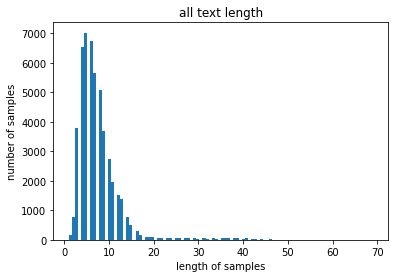

In [133]:
plt.title('all text length')
plt.hist(num_tokens, bins=100)
# bins는 가로축 구간의 개수
# (막대 그래프의 갯수)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [134]:
select_length = 25


def below_threshold_len(max_len, nested_list):
    cnt = 0
    for s in nested_list:
        if(len(s) <= max_len):
            cnt = cnt + 1
        
    print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))))

# data_list에는 전체 문장 데이터들을 token화 시킨 뒤,
# 의미있는 단어들의 품사들만 필터링한 (불용어 처리한) 단어들의 집함임!    
below_threshold_len(select_length, data_list)

전체 샘플 중 길이가 25 이하인 샘플의 비율: 0.9825827022718214


# 토큰 길이를 25로 설정한다면 전체 데이터의 99% 정도를 표현할 수 있다!
# 단, 25의 길이보다 큰 데이터들은 영향이 미미하여 굳이 삭제하지 않음!

In [135]:
# 단어 시퀀스 벡터 크기
MAX_SEQ_LEN = 25

#CNN 모델 구현

In [136]:
# Conv1D, 의도 분류 모델이기 때문에 softmax
# 의도는 일단 3가지만 분류

import pandas as pd
import tensorflow as tf
from tensorflow.keras import preprocessing
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Dense, Dropout, Conv1D, GlobalMaxPool1D, concatenate

#from utils.Preprocess import Preprocess
# 대신 직접 class 선언해줌! (import 파일 만들기 귀찮음)

class Preprocess:
    def __init__(self, word2index_dic='../train_tools/dict/chatbot_dict.bin' ,userdic='user_dic.tsv'): # userdic 인자에는 사용자 정의 사전 파일 경로 입력가능
        # 단어 인덱스 사전 불러오기 추가
        if(word2index_dic != ''):
            f = open(word2index_dic, "rb")
            self.word_index = pickle.load(f)
            f.close()
            print("단어 사전 로드 완료..")
        else:
            self.word_index = None
            print("단어 사전 로드 실패..")

        # 형태소 분석기 초기화
        self.komoran = Komoran(userdic=userdic)

        # 제외할 품사
        # 참조 : https://docs.komoran.kr/firststep/postypes.html
        # 관계언 제거, 기호 제거
        # 어미 제거
        # 접미사 제거
        self.exclusion_tags = [
            'JKS', 'JKC', 'JKG', 'JKO', 'JKB', 'JKV', 'JKQ',
            # 주격조사, 보격조사, 관형격조사, 목적격조사, 부사격조사, 호격조사, 인용격조사
            'JX', 'JC',
            # 보조사, 접속조사
            'SF', 'SP', 'SS', 'SE', 'SO',
            # 마침표,물음표,느낌표(SF), 쉼표,가운뎃점,콜론,빗금(SP), 따옴표,괄호표,줄표(SS), 줄임표(SE), 붙임표(물결,숨김,빠짐)(SO)
            'EP', 'EF', 'EC', 'ETN', 'ETM',
            # 선어말어미, 종결어미, 연결어미, 명사형전성어미, 관형형전성어미
            'XSN', 'XSV', 'XSA'
            # 명사파생접미사, 동사파생접미사, 형용사파생접미사
        ]


    # 형태소 분석기 POS 태거
    def pos(self, sentence):
        return self.komoran.pos(sentence)

    # 불용어 제거 후 필요한 품사 정보만 가져오기
    def get_keywords(self, pos, without_tag=False):
        f = lambda x: x in self.exclusion_tags
        word_list = []
        for p in pos:
            if f(p[1]) is False:
                word_list.append(p if without_tag is False else p[0])
        return word_list

    # 키워드를 단어 인덱스 시퀀스로 변환
    def get_wordidx_sequence(self, keywords):
        if self.word_index is None:
            return []
        w2i = []
        for word in keywords:
            try:
                w2i.append(self.word_index[word])
            except KeyError:
                # 해당 단어가 사전에 없는 경우 OOV 처리
                w2i.append(self.word_index['OOV'])
        return w2i

In [137]:
!pwd

# Load Data
data = pd.read_csv("train_data.csv")

# text는 모든 문장들의 list
text = data['text'].tolist()
# label은 모든 label의 list
label = data['label'].tolist()

/content/drive/MyDrive/새싹_인공지능SW교육/프로젝트/새싹_최종프로젝트/chatbot_try/csv_data


In [138]:
data.tail()

,text,label
50175,선배님들은 아이출산하고 언제쯤 생리 시작하셨나요?,2
50176,부정출혈이 있고 난 후 며칠 뒤에 생리 시작하는지 아시는분 있나요...?,2
50177,언제 시작하고 언제 끝났는지,2
50178,며칠전에 머리를 매직하고 나서부터슬슬 여자로서의 자각은 가지고 다니기 시작했는데얼마...,2
50179,가을언제 시작햇다고 끝나냐 ...,2


In [139]:
text[:5]

['이 영화 있는사람 공유 부탁합니다 제 폰번호 010 4427 2774 연락한통만요^-^;',
 '작가때문에 1점 주려다가 영화가 너무 좋아서 10점줌비행기를 끌고 추운곳에다 추락시키는대 애시당초 비행기 자체가"자동항법으로 운행되는대 비밀번호가 필요해 그러니 파괴시켜야해"가 아닌 그냥 자기가 운전해서 가따박음그럴거면 그냥 안전하게 착륙해',
 '비밀번호가 뭐야? 서윤내사랑 ㅋ_ㅋ',
 '용팔이 시르즈를 볼려면 어떻게 하는지.전화번호좀',
 '보다 말았는데 심장 졸라 쫄깃해진다;; 근데 여주 졸라 답답함. 세면대 물기 닦는 철저함도 보였으면서 차번호도 안봐두고...글고 주유소에 불 지르면 될텐데... 글고 쪼매난 총으로 뭐 어쩌려고 미친놈 소굴에 따라가냐']

In [140]:
label[:5]

[0, 0, 0, 0, 0]

In [141]:
# Load preprocessor
p = Preprocess(word2index_dic='/content/drive/MyDrive/새싹_인공지능SW교육/프로젝트/새싹_최종프로젝트/chatbot_try/chatbot_dict.bin',
               userdic='/content/drive/MyDrive/새싹_인공지능SW교육/프로젝트/새싹_최종프로젝트/chatbot_try/useridc/user_dic.tsv')

단어 사전 로드 완료..


In [142]:
# Data preprocess

# !pip install tqdm
from tqdm import tqdm

sequences = []
check_keywords = True
# text는 모든 문장들의 list
for sentence in tqdm(text):

    # 문장을 [(단어1,품사1),(단어2,품사2)...] 로 변환
    pos = p.pos(sentence)

    # get_keywords(pos, without_tag=True) => 불용어 처리 후 품사(태그)없이 단어들만의 list
    # keywords : 불용어 처리된 [(단어1,품사1),(단어2,품사2)...], list형
    keywords = p.get_keywords(pos, without_tag=True)

    # 첫번째 keywords 와 sequence[0] 어떻게 대응되는지 체크해보고 싶음
    if check_keywords is True:
      print(keywords)
      check_keywords = False
    # 태그없이 '단어'만 있는 keywords에서 [[단어1,단어2],[단어1,단어2,단어3]...]들을 인덱싱해줌
    # 우리가 만든 단어사전에 없으면(OOV token이므로 인덱스 1로 고정)
    seq = p.get_wordidx_sequence(keywords)
    sequences.append(seq)

  0%|          | 0/50180 [00:00<?, ?it/s]

['이', '영화', '있', '사람', '공유', '부탁', '제', '폰', '번호', '010', '4427', '2774', '연락', '한통', '만요', '^', '^']


100%|██████████| 50180/50180 [00:48<00:00, 1027.56it/s]


In [143]:
# 이렇게 대응됌

# ['이', '영화', '있', '사람', '공유', '부탁', '제', '폰', '번호', '010', '4427', '2774', '연락', '한통', '만요', '^', '^']
print(sequences[0])

[3, 49, 15, 82, 1642, 350, 287, 1180, 325, 33113, 73719, 73720, 217, 9572, 1248, 1, 1]


In [144]:
# set padding length & pad to sequences

# import 하지말고 직접 선언!
#from config.GlobalParams import MAX_SEQ_LEN


# 단어 시퀀스 벡터 크기 (데이터 99% 활용가능)
MAX_SEQ_LEN = 25

#from tensorflow.keras import preprocessing
# 최대 크기를 25단어로 하고 그 보다 길이가 작은 문장들은 뒤에 0이라는 의미없는 단어를 을 채워서 문장 길이를 25단어로 맞춤
# https://wikidocs.net/83544
# padding=post 안하면 앞에서 부터 0을 채움

padded_seqs = preprocessing.sequence.pad_sequences(sequences, maxlen=MAX_SEQ_LEN, padding='post')

In [145]:
# 모델에 넣어 학습하기 위해
# 문장별로 단어의 갯수를 25개로 맞춰줌

len(padded_seqs[0]) ,len(padded_seqs[1]),len(padded_seqs[2])

(25, 25, 25)

In [146]:
padded_seqs[0]

array([    3,    49,    15,    82,  1642,   350,   287,  1180,   325,
       33113, 73719, 73720,   217,  9572,  1248,     1,     1,     0,
           0,     0,     0,     0,     0,     0,     0], dtype=int32)

In [147]:
# data to tensor

# tf.data.Dataset.from_tensor_slices((데이터,라벨))
# 데이터와 라벨을 묶음
# https://yuna96.tistory.com/77
ds = tf.data.Dataset.from_tensor_slices((padded_seqs, label))

# 섞어줌
# 크기만큼 섞어야 다섞임
# https://helloyjam.github.io/tensorflow/buffer-size-in-shuffle/
ds = ds.shuffle(len(text))

In [148]:
# set train & validation & test size

# 갯수 설정
# https://dacon.io/en/codeshare/5774
train_size = int(len(padded_seqs) * 0.7)
val_size = int(len(padded_seqs) * 0.2)
test_size = int(len(padded_seqs) * 0.1)

# 교차검증(?) take().take() 잘은 모르겠음
train_ds = ds.take(train_size).batch(100)
val_ds = ds.take(train_size).take(val_size).batch(100)
test_ds = ds.take(train_size + val_size).take(test_size).batch(100)

In [149]:
# Hyperparameter
# https://derekahndev.github.io/machine%20learning/chatbot-3/

dropout_prob = 0.5
EMB_SIZE = 128
EPOCH = 3

# 전체 단어수
VOCAB_SIZE = len(p.word_index) + 1

In [150]:
# CNN model definition
input_layer = Input(shape=(MAX_SEQ_LEN, ))
embedding_layer = Embedding(VOCAB_SIZE, EMB_SIZE, input_length=MAX_SEQ_LEN)(input_layer)
dropout_emb = Dropout(rate=dropout_prob)(embedding_layer)

conv1 = Conv1D(
    filters=128,
    kernel_size=3,
    padding='valid',
    activation=tf.nn.relu)(dropout_emb)
pool1 = GlobalMaxPool1D()(conv1)

conv2 = Conv1D(
    filters=128,
    kernel_size=4,
    padding='valid',
    activation=tf.nn.relu)(dropout_emb)
pool2 = GlobalMaxPool1D()(conv2)

conv3 = Conv1D(
    filters=128,
    kernel_size=5,
    padding='valid',
    activation=tf.nn.relu)(dropout_emb)
pool3 = GlobalMaxPool1D()(conv3)

concat = concatenate([pool1, pool2, pool3])

hidden = Dense(128, activation=tf.nn.relu)(concat)
dropout_hidden = Dropout(rate=dropout_prob)(hidden)
logits = Dense(3, name='logits')(dropout_hidden)
predictions = Dense(3, activation=tf.nn.softmax)(logits)

In [151]:
# CNN model create
model = Model(inputs=input_layer, outputs=predictions)
model.compile(optimizer='adam',
              # 다중분류 : sparse_categorical_crossentropy
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [152]:
!pwd

/content/drive/MyDrive/새싹_인공지능SW교육/프로젝트/새싹_최종프로젝트/chatbot_try/csv_data


In [153]:
# train model
model.fit(train_ds, validation_data=val_ds, epochs=EPOCH, verbose=1)

# evaluate model
loss, accuracy = model.evaluate(test_ds, verbose=1)
print("Accuracy: %f" % (accuracy * 100))
print("loss : %f" % (loss))

# save model
model.save('/content/drive/MyDrive/새싹_인공지능SW교육/프로젝트/새싹_최종프로젝트/chatbot_try/models/intent_model.h5')

Epoch 1/3
352/352 [==============================] - 21s 20ms/step - loss: 0.1057 - accuracy: 0.9568 - val_loss: 0.0081 - val_accuracy: 0.9973
Epoch 2/3
352/352 [==============================] - 7s 20ms/step - loss: 0.0095 - accuracy: 0.9971 - val_loss: 0.0034 - val_accuracy: 0.9991
Epoch 3/3
51/51 [==============================] - 0s 3ms/step - loss: 0.0027 - accuracy: 0.9994
Accuracy: 99.940217
loss : 0.002674


# 구현 모델 테스트

In [154]:
import tensorflow as tf
from tensorflow.keras.models import Model, load_model
from tensorflow.keras import preprocessing
import gc

# 의도 분류 모델 모듈
class IntentModel:
    def __init__(self, model_name, preprocess):

        # 의도 클래스별 레이블블
        self.labels = {0: "번호", 1: "장소", 2: "시간"}

        # 의도 분류 모델 불러오기
        self.model = load_model(model_name)

        # 챗봇 텍스트 전처리기
        self.p = preprocess

    # 의도 클래스 예측
    def predict_class(self, query):
        # 형태소 분석
        pos = self.p.pos(query)

        # 문장내 키워드 추출(불용어 제거)
        keywords = self.p.get_keywords(pos, without_tag=True)
        sequences = [self.p.get_wordidx_sequence(keywords)]

        # 단어 시퀀스 벡터 크기
        # from config.GlobalParams import MAX_SEQ_LEN
        # 변수로 선언해버림!@@@@@@@@@@@@@@@@@@@@@@@@

        # 패딩처리
        padded_seqs = preprocessing.sequence.pad_sequences(sequences, maxlen=MAX_SEQ_LEN, padding='post')

        predict = self.model.predict(padded_seqs)
        predict_class = tf.math.argmax(predict, axis=1)
        return predict_class.numpy()[0]

In [155]:
p = Preprocess(word2index_dic='/content/drive/MyDrive/새싹_인공지능SW교육/프로젝트/새싹_최종프로젝트/chatbot_try/chatbot_dict.bin',
               userdic='/content/drive/MyDrive/새싹_인공지능SW교육/프로젝트/새싹_최종프로젝트/chatbot_try/useridc/user_dic.tsv')

intent = IntentModel(model_name='/content/drive/MyDrive/새싹_인공지능SW교육/프로젝트/새싹_최종프로젝트/chatbot_try/models/intent_model.h5', preprocess=p)

query = "컴공 과사 번호 알려줘"
predict = intent.predict_class(query)
predict_label = intent.labels[predict]
print("="*30)
print(query)
print("의도 예측 클래스 : ", predict)
print("의도 예측 레이블 : ", predict_label)


query = "회계팀 전화번호 알려줘."
predict = intent.predict_class(query)
predict_label = intent.labels[predict]
print("="*30)
print(query)
print("의도 예측 클래스 : ", predict)
print("의도 예측 레이블 : ", predict_label)


query = "학교 도서관 번호는??"
predict = intent.predict_class(query)
predict_label = intent.labels[predict]
print("="*30)
print(query)
print("의도 예측 클래스 : ", predict)
print("의도 예측 레이블 : ", predict_label)


query = "본관 건물 위치 어디야?"
predict = intent.predict_class(query)
predict_label = intent.labels[predict]
print("="*30)
print(query)
print("의도 예측 클래스 : ", predict)
print("의도 예측 레이블 : ", predict_label)


query = "학교 운동장은 위치 알려줘"
predict = intent.predict_class(query)
predict_label = intent.labels[predict]
print("="*30)
print(query)
print("의도 예측 클래스 : ", predict)
print("의도 예측 레이블 : ", predict_label)


query = "기간 언제까지야?"
predict = intent.predict_class(query)
predict_label = intent.labels[predict]
print("="*30)
print(query)
print("의도 예측 클래스 : ", predict)
print("의도 예측 레이블 : ", predict_label)

query = "OOO행사 제출 마감 날짜 알려줘"
predict = intent.predict_class(query)
predict_label = intent.labels[predict]
print("="*30)
print(query)
print("의도 예측 클래스 : ", predict)
print("의도 예측 레이블 : ", predict_label)
print("="*30)

단어 사전 로드 완료..
1/1 [==============================] - 0s 163ms/step
컴공 과사 번호 알려줘
의도 예측 클래스 :  0
의도 예측 레이블 :  번호
1/1 [==============================] - 0s 15ms/step
회계팀 전화번호 알려줘.
의도 예측 클래스 :  0
의도 예측 레이블 :  번호
1/1 [==============================] - 0s 14ms/step
학교 도서관 번호는??
의도 예측 클래스 :  0
의도 예측 레이블 :  번호
1/1 [==============================] - 0s 13ms/step
본관 건물 위치 어디야?
의도 예측 클래스 :  1
의도 예측 레이블 :  장소
1/1 [==============================] - 0s 13ms/step
학교 운동장은 위치 알려줘
의도 예측 클래스 :  1
의도 예측 레이블 :  장소
1/1 [==============================] - 0s 14ms/step
기간 언제까지야?
의도 예측 클래스 :  2
의도 예측 레이블 :  시간
1/1 [==============================] - 0s 13ms/step
OOO행사 제출 마감 날짜 알려줘
의도 예측 클래스 :  2
의도 예측 레이블 :  시간


# 여기까지 사용자의 input에 따른 의도 분류 모델 만듬
# 이후 의도(클래스)만 분류하여 한번 필터링하고
# 사용자의 input이 정확하게 어떤 질문인지 코사인유사도를 통해(모델 하나 더 만들어서)
# 그에 대한 답변을 출력해주어야함
# 같은 의미의 여러 질문 문장+1가지 대한 답들을 학습시키면 됌

In [156]:
# 의도/질문(Query)/답변(Answer)/답변 이미지 
# 총 4개의 컬럼으로 구성된 데이터 학습

In [157]:
# 사용자의 질문이 들어오면 구축한 데이터로 부터 올바른 질문이 선택되어 답변이 출력되어야함
# 이를 위해 문장 유사도 판별 모델: Semantic Textual Similarity STS가 필요함

In [159]:
# Word2Vec로도 가능하지만
# 더 양질의 데이터로 훈련된 KR-SBERT 모델로 만들어본다
# SBERT는 기존 BERT 구조에서 문장 임베딩의 성능을 우수하게 개선시킨 모델임

In [163]:
# 코사인 유사도
# 문장,단어들을 벡터로 표현하여 벡터간 거리나 각도를 활용해 유사성을 파악함
# 코사인 값은 -1~1이고 두 벡터의 방향이 완전히 같으면 1 반대면 -1,직각이면 0을 가짐

In [164]:
# KR-SBERT 설치
# !pip install -U sentence-transformers

In [162]:
import pandas as pd
from tqdm import tqdm
tqdm.pandas()

import torch
from sentence_transformers import SentenceTransformer

In [165]:
# train_file : 의도/질문(Query)/답변(Answer)/답변 이미지 총 4개의 칼럼으로 구성된 엑셀

train_file = "/content/drive/MyDrive/새싹_인공지능SW교육/프로젝트/새싹_최종프로젝트/chatbot_try/csv_data/train_data.xlsx"
model = SentenceTransformer('snunlp/KR-SBERT-V40K-klueNLI-augSTS')

df = pd.read_excel(train_file)
df.head()

,의도(Intent),질문(Query),답변(Answer),답변 이미지
0,번호,교목실채플번호알려줘,☎️교목실 & 대학교회 번호 안내입니다\n[교목실 번호]\n→ 교목 : 041-54...,없음
1,번호,채플번호알려줘,☎️교목실 & 대학교회 번호 안내입니다\n[교목실 번호]\n→ 교목 : 041-54...,없음
2,번호,교회번호알려줘,☎️교목실 & 대학교회 번호 안내입니다\n[교목실 번호]\n→ 교목 : 041-54...,없음
3,번호,대학교회번호알려줘,☎️교목실 & 대학교회 번호 안내입니다\n[교목실 번호]\n→ 교목 : 041-54...,없음
4,번호,비서실번호알려줘,☎️비서실 번호 안내입니다\n→ 비서실장 : 041-540-5006\n→ 팀장 : ...,없음


In [166]:
df['embedding_vector'] = df['질문(Query)'].progress_map(lambda x : model.encode(x))
df.head()

100%|██████████| 336/336 [00:09<00:00, 33.77it/s]


,의도(Intent),질문(Query),답변(Answer),답변 이미지,embedding_vector
0,번호,교목실채플번호알려줘,☎️교목실 & 대학교회 번호 안내입니다\n[교목실 번호]\n→ 교목 : 041-54...,없음,"[0.3686635, 0.48566246, -0.47051, 0.8489659, 0..."
1,번호,채플번호알려줘,☎️교목실 & 대학교회 번호 안내입니다\n[교목실 번호]\n→ 교목 : 041-54...,없음,"[0.113316834, -0.41515067, -0.533655, 0.883482..."
2,번호,교회번호알려줘,☎️교목실 & 대학교회 번호 안내입니다\n[교목실 번호]\n→ 교목 : 041-54...,없음,"[0.68807167, -0.13648753, -0.5817972, 1.700603..."
3,번호,대학교회번호알려줘,☎️교목실 & 대학교회 번호 안내입니다\n[교목실 번호]\n→ 교목 : 041-54...,없음,"[0.30210784, 0.0089228, 0.2502373, 1.4194367, ..."
4,번호,비서실번호알려줘,☎️비서실 번호 안내입니다\n→ 비서실장 : 041-540-5006\n→ 팀장 : ...,없음,"[0.14611152, -0.35816795, 0.4648213, 0.7911189..."


In [179]:
df.tail()

,의도(Intent),질문(Query),답변(Answer),답변 이미지,embedding_vector
331,장소,애니메이션학과위치알려줘,애니메이션학과 장소 안내입니다 :)\n→ 애니메이션학과 사무실 : 조형과학관 212-1호,:5000/images/21,"[0.52783734, 0.3487568, 0.73597133, 0.00522043..."
332,장소,애니과위치알려줘,애니메이션학과 장소 안내입니다 :)\n→ 애니메이션학과 사무실 : 조형과학관 212-1호,:5000/images/21,"[-0.19731434, -0.13983941, 0.046960443, 0.5699..."
333,장소,식품제약공학부위치알려줘,식품제약공학부 장소 안내입니다 :)\n→ 식품제약공학부 사무실 : 자연과학관 104-1호,:5000/images/13,"[0.71943337, -0.1247908, -0.3049367, -0.290658..."
334,장소,화장품생명공학부위치알려줘,화장품생명공학부 장소 안내입니다 :)\n→ 화장품생명공학부 사무실 : 자연과학관 1...,:5000/images/13,"[0.095584475, 0.44509286, -0.56194085, 0.48106..."
335,장소,벤처대학원교학팀위치알려줘,벤처대학원교학팀 위치 안내\n: 벤처대학원 202호 (서울시 서초구 남부순환로249...,없음,"[0.79590744, 0.17077734, 0.27100098, -0.185305..."


In [171]:
# '교목실채플번호알려줘' 의 embedding_vector

df.iloc[0,4]

array([ 3.68663490e-01,  4.85662460e-01, -4.70510006e-01,  8.48965883e-01,
        2.56520081e-02, -8.48455846e-01, -3.19575340e-01,  4.05023605e-01,
        4.17824060e-01,  2.89241016e-01,  1.66649505e-01,  9.24993336e-01,
        1.41852116e-02,  3.65865350e-01,  2.70099938e-01, -1.40637243e+00,
        2.00024601e-02, -7.02337265e-01, -1.17650786e-02,  1.86562911e-01,
        1.92100033e-01, -5.09609044e-01, -4.52199727e-01,  9.39792812e-01,
        1.69470444e-01, -1.16246021e+00,  3.71498726e-02,  4.17821854e-01,
       -2.43134513e-01, -2.58382767e-01, -4.23279665e-02, -1.76647276e-01,
        7.63403177e-01, -2.29497969e-01,  4.27859962e-01,  2.28129297e-01,
       -7.05385923e-01,  9.38748360e-01,  1.27821457e+00, -9.92071331e-01,
       -8.69916558e-01, -3.58114570e-01, -4.48264629e-01, -7.50003040e-01,
       -1.43877172e+00,  7.46222213e-02, -3.31932515e-01, -7.37046301e-02,
       -4.15899098e-01, -2.24245414e-01, -2.56169558e-01, -3.30921471e-01,
        3.71661745e-02,  

In [173]:
!pwd
# ['질문(Query)']의 모든 데이터들을 embedding_vector화 시킴

df.to_excel("train_data_embedding.xlsx", index=False)

/content/drive/MyDrive/새싹_인공지능SW교육/프로젝트/새싹_최종프로젝트/chatbot_try/csv_data


In [178]:
# ['질문(Query)']의 모든 데이터들 갯수

len(df['embedding_vector'].tolist())

336

In [183]:
embedding_data = torch.tensor(df['embedding_vector'].tolist())
embedding_data[0:2] , len(embedding_data[0])

(tensor([[ 0.3687,  0.4857, -0.4705,  ...,  0.0315, -0.5420, -0.6331],
         [ 0.1133, -0.4152, -0.5337,  ..., -0.4512,  0.0867, -0.1873]]), 768)

In [184]:
# 여러 질문들을 텐서화(벡터화) 시킴

torch.save(embedding_data, 'embedding_data.pt')

# 임베딩 파일 로드, 유사도 측정

In [185]:
import torch
import numpy as np
import pandas as pd
from sentence_transformers import SentenceTransformer, util

model = SentenceTransformer('snunlp/KR-SBERT-V40K-klueNLI-augSTS')

# 의도/질문/답변/답변 이미지 원본 엑셀 데이터
df = pd.read_excel('/content/drive/MyDrive/새싹_인공지능SW교육/프로젝트/새싹_최종프로젝트/chatbot_try/csv_data/train_data.xlsx')

# 질문 데이터들만 embedding 함 데이터
embedding_data = torch.load('/content/drive/MyDrive/새싹_인공지능SW교육/프로젝트/새싹_최종프로젝트/chatbot_try/csv_data/embedding_data.pt')

In [186]:
# 질문 예시 문장

sentence = "컴공 과사 번호 알려줘" # train_data.xlsx 엑셀 파일의 146번 질문 '컴공번호알려줘' 가 나와야함
                                   # idx로는 144
print("질문 문장 : ",sentence)
sentence = sentence.replace(" ","")
print("공백 제거 문장 : ", sentence)

# 질문 예시 문장 인코딩 후 텐서화
sentence_encode = model.encode(sentence)
sentence_tensor = torch.tensor(sentence_encode)

# 저장한 임베딩 데이터와의 코사인 유사도 측정
cos_sim = util.cos_sim(sentence_tensor, embedding_data)
print(f"가장 높은 코사인 유사도 idx : {int(np.argmax(cos_sim))}")

질문 문장 :  컴공 과사 번호 알려줘
공백 제거 문장 :  컴공과사번호알려줘
가장 높은 코사인 유사도 idx : 144


In [187]:
# 선택된 질문 출력
best_sim_idx = int(np.argmax(cos_sim))
selected_qes = df['질문(Query)'][best_sim_idx]
print(f"선택된 질문 = {selected_qes}")

# 선택된 질문 문장에 대한 인코딩
selected_qes_encode = model.encode(selected_qes)

선택된 질문 = 컴공번호알려줘


In [188]:
# np.dot 벡터 내적

a = np.array([1, 3, 5])
b = np.array([4, 2, 1])
np.dot(a, b)

15

In [189]:
# 유사도 점수 측정
print(f'np.dot(sentence_tensor, selected_qes_encode) 값: {np.dot(sentence_tensor, selected_qes_encode)}')
print(f'(np.linalg.norm(sentence_tensor) 값: {np.linalg.norm(sentence_tensor)}')
print(f'(np.linalg.norm(selected_qes_encode) 값: {np.linalg.norm(selected_qes_encode)}')
score = np.dot(sentence_tensor, selected_qes_encode) / (np.linalg.norm(sentence_tensor) * np.linalg.norm(selected_qes_encode))
print(f"선택된 질문과의 유사도 = {score}")

# 답변
answer = df['답변(Answer)'][best_sim_idx]
imageUrl = df['답변 이미지'][best_sim_idx]
print(f"\n답변 : {answer}\n")
print(f"답변 이미지 : {imageUrl}")

np.dot(sentence_tensor, selected_qes_encode) 값: 323.629150390625
(np.linalg.norm(sentence_tensor) 값: 18.425678253173828
(np.linalg.norm(selected_qes_encode) 값: 18.317384719848633
선택된 질문과의 유사도 = 0.9588721394538879

답변 : ☎컴퓨터공학부 번호 안내입니다
→ 사물인터넷트랙 : 041-540-5695
→ FAX : 041-548-9667
→ 정보보호학트랙 : 041-540-5698
→ FAX : 041-540-5718
→ 대학원실1 : 041-540-9560
→ 대학원실2 : 041-540-5284
→ 인공지능트랙 : 041-540-5584
→ FAX : 041-548-9667

답변 이미지 : 없음


# 텍스트 직접 입력해서 질문에 대한 답변 출력하기
# test_sample 라는 문자열 변수에 질문 리스트와 비슷한 질문 해보기

In [224]:
test_sample = '나 여기 처음왔는데 골프장 위치 좀 빨리 알려줄래?'
test_sample = test_sample.replace(" ","")
test_sample_encode = model.encode(test_sample)
test_sample_tensor = torch.tensor(test_sample_encode)
cos_sim = util.cos_sim(test_sample_tensor, embedding_data)
print(f"가장 높은 코사인 유사도 idx : {int(np.argmax(cos_sim))}")

# 선택된 질문 출력
best_sim_idx = int(np.argmax(cos_sim))
test_sample_qes = df['질문(Query)'][best_sim_idx]
print(f"선택된 질문 = {test_sample_qes}")

# 선택된 질문 문장에 대한 인코딩
selected_qes_encode = model.encode(test_sample_qes)

# 유사도 점수 측정
print(f'np.dot(sentence_tensor, selected_qes_encode) 값: {np.dot(test_sample_tensor, test_sample_encode)}')
print(f'(np.linalg.norm(sentence_tensor) 값: {np.linalg.norm(test_sample_tensor)}')
print(f'(np.linalg.norm(selected_qes_encode) 값: {np.linalg.norm(selected_qes_encode)}')
score = np.dot(test_sample_tensor, test_sample_encode) / (np.linalg.norm(test_sample_tensor) * np.linalg.norm(selected_qes_encode))
print(f"선택된 질문과의 유사도 = {score}")

# 답변
answer = df['답변(Answer)'][best_sim_idx]
imageUrl = df['답변 이미지'][best_sim_idx]
print(f"\n답변 : {answer}\n")
print(f"답변 이미지 : {imageUrl}")


가장 높은 코사인 유사도 idx : 233
선택된 질문 = 골프연습장위치알려줘
np.dot(sentence_tensor, selected_qes_encode) 값: 324.24774169921875
(np.linalg.norm(sentence_tensor) 값: 18.006879806518555
(np.linalg.norm(selected_qes_encode) 값: 18.27978515625
선택된 질문과의 유사도 = 0.9850707054138184

답변 : 16-골프전공실습장 장소 안내입니다 :)
1F : 골프연습장, 강의실
2F : 교수연구실, 학과사무실

답변 이미지 : :5000/images/16


In [225]:
# 음성->텍스트 구글 api
# !pip install speechrecognition 

In [208]:
# 음성녹음 라이브러리

# !pip install sounddevice
# !pip install SciPy
# !sudo apt-get install libportaudio2

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-510
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  libportaudio2
0 upgraded, 1 newly installed, 0 to remove and 27 not upgraded.
Need to get 65.4 kB of archives.
After this operation, 223 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 libportaudio2 amd64 19.6.0-1build1 [65.4 kB]
Fetched 65.4 kB in 0s (1,174 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Te

# 실제로 음성파일 녹음해서 wav 저장하고 이에 대한 답변 출력하기

In [217]:
# 녹음한 음성파일 구글 speech-recognition 활용 텍스트로 받아오기!
# window 녹음한 음성파일.m4a 를 wav로 바꾸기
# https://convertio.co/kr/download/75534fe356771de13219a04246bc264104364b/
# 아니면 파이썬 코드로 자동화!

import speech_recognition as sr
sr.__version__

'3.9.0'

In [218]:
r = sr.Recognizer()

In [222]:
user_request = sr.AudioFile('/content/drive/MyDrive/새싹_인공지능SW교육/프로젝트/새싹_최종프로젝트/chatbot_try/audio_files/sample2.wav')
with user_request as source:
  sample = r.record(source)
r.recognize_google(sample, language='ko-KR')

result2:
{   'alternative': [   {   'confidence': 0.81282455,
                           'transcript': '안녕하세요 저 처음 맞는데요 기숙사지도 위치 어딘가요'},
                       {'transcript': '안녕하세요 저 처음 봤는데요 기숙사지도 위치 어딘가요'},
                       {'transcript': '안녕하세요 저 처음 봤는데요 기숙사지도 위치 어디인가요'},
                       {'transcript': '안녕하세요 저 처음 맞는데요 기숙사지도 위치 어디인가요'},
                       {'transcript': '안녕하세요 여기 처음 맞는데요 기숙사지도 위치 어딘가요'}],
    'final': True}


'안녕하세요 저 처음 맞는데요 기숙사지도 위치 어딘가요'

In [223]:
# 텍스트로 받은 사용자 질문 
# 챗봇이 받아서 답변 출력하기

test_sample = r.recognize_google(sample, language='ko-KR')
test_sample = test_sample.replace(" ","")
test_sample_encode = model.encode(test_sample)
test_sample_tensor = torch.tensor(test_sample_encode)
cos_sim = util.cos_sim(test_sample_tensor, embedding_data)
print(f"가장 높은 코사인 유사도 idx : {int(np.argmax(cos_sim))}")

# 선택된 질문 출력
best_sim_idx = int(np.argmax(cos_sim))
test_sample_qes = df['질문(Query)'][best_sim_idx]
print(f"선택된 질문 = {test_sample_qes}")

# 선택된 질문 문장에 대한 인코딩
selected_qes_encode = model.encode(test_sample_qes)

# 유사도 점수 측정
print(f'np.dot(sentence_tensor, selected_qes_encode) 값: {np.dot(test_sample_tensor, test_sample_encode)}')
print(f'(np.linalg.norm(sentence_tensor) 값: {np.linalg.norm(test_sample_tensor)}')
print(f'(np.linalg.norm(selected_qes_encode) 값: {np.linalg.norm(selected_qes_encode)}')
score = np.dot(test_sample_tensor, test_sample_encode) / (np.linalg.norm(test_sample_tensor) * np.linalg.norm(selected_qes_encode))
print(f"선택된 질문과의 유사도 = {score}")

# 답변
answer = df['답변(Answer)'][best_sim_idx]
imageUrl = df['답변 이미지'][best_sim_idx]
print(f"\n답변 : {answer}\n")
print(f"답변 이미지 : {imageUrl}")

result2:
{   'alternative': [   {   'confidence': 0.81282443,
                           'transcript': '안녕하세요 저 처음 맞는데요 기숙사지도 위치 어딘가요'},
                       {'transcript': '안녕하세요 저 처음 봤는데요 기숙사지도 위치 어딘가요'},
                       {'transcript': '안녕하세요 저 처음 봤는데요 기숙사지도 위치 어디인가요'},
                       {'transcript': '안녕하세요 저 처음 맞는데요 기숙사지도 위치 어디인가요'},
                       {'transcript': '안녕하세요 여기 처음 맞는데요 기숙사지도 위치 어딘가요'}],
    'final': True}
가장 높은 코사인 유사도 idx : 329
선택된 질문 = 행복기숙사위치알려줘
np.dot(sentence_tensor, selected_qes_encode) 값: 339.2543640136719
(np.linalg.norm(sentence_tensor) 값: 18.418859481811523
(np.linalg.norm(selected_qes_encode) 값: 18.557279586791992
선택된 질문과의 유사도 = 0.9925408959388733

답변 : 44-행복기숙사 장소 안내입니다 :)
홈페이지에 정보가 없어요 :(

답변 이미지 : :5000/images/44
